In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('hartrain.csv')

In [3]:
df.shape

(7352, 563)

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
x = df.drop('Activity',axis=1)
y = df['Activity']

In [6]:
#LABEL ENCONDING

le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.982324949014276


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
##  METHOD 1 :- DELETING DUPLICATE COLUMNS

In [10]:
def get_duplicate_columns(df):
    duplicate_columns= {}
    seen_columns= {}
    
    for column in df.columns:
        current_column = df[column]
        
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()
            
        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column
            
    return duplicate_columns

In [11]:
# def get_duplicate_columns(df):
    
#     duplicate_columns = {}
#     seen_columns = {}

#     for column in df.columns:
#         current_column = df[column]

#         # Convert column data to bytes
#         try:
#             current_column_hash = current_column.values.tobytes()
#         except AttributeError:
#             current_column_hash = current_column.to_string().encode()

#         if current_column_hash in seen_columns:
#             if seen_columns[current_column_hash] in duplicate_columns:
#                 duplicate_columns[seen_columns[current_column_hash]].append(column)
#             else:
#                 duplicate_columns[seen_columns[current_column_hash]] = [column]
#         else:
#             seen_columns[current_column_hash] = column

#     return duplicate_columns

In [12]:
duplicate_columns = get_duplicate_columns(x_train)

In [13]:
duplicate_columns

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [14]:
# Deleting the values and keeping the keys of the dictionary duplicate_columns from train and test
for one_list in duplicate_columns.values():
    x_train.drop(columns = one_list,inplace = True)
    x_test.drop(columns = one_list,inplace = True)

In [15]:
x_test.shape

(1471, 541)

In [16]:
## METHOD 2 :- VARIANCE THRESHOLD

In [17]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 0.05)

In [18]:
sel.fit(x_train)

VarianceThreshold(threshold=0.05)

In [19]:
# columns whose variance is greater then 0.05
sum(sel.get_support())

350

In [20]:
# columns that are greater then 0.05 var
columns = x_train.columns[sel.get_support()]

In [21]:
# removing columns that have variance less then 0.05
x_train = sel.transform(x_train)
x_test = sel.transform(x_test)

In [22]:
# changing x_train and test to dataframe as it got change to numpy when transformed

x_train = pd.DataFrame(x_train,columns=columns)
x_test = pd.DataFrame(x_test,columns=columns)

In [23]:
x_test.shape

(1471, 350)

In [24]:
# correlation for feature selection

In [25]:
import seaborn as sns

<AxesSubplot:>

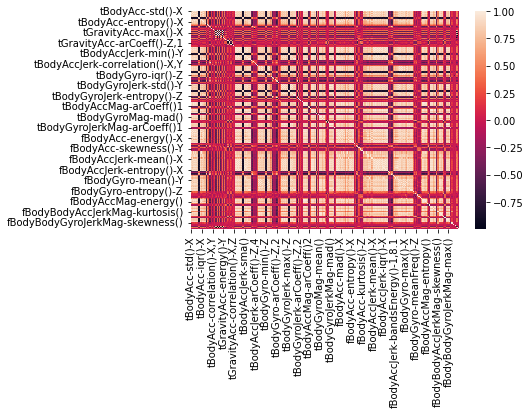

In [26]:
sns.heatmap(x_train.corr())

In [27]:
corr_matrix = x_train.corr()

In [28]:
columns = corr_matrix.columns
columns_to_drop = []

for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        if corr_matrix.loc[columns[i],columns[j]]>0.95:
            columns_to_drop.append(columns[j])
print(len(columns_to_drop))

1508


In [29]:
columns_to_drop = set(columns_to_drop)
print(len(columns_to_drop))

197


In [30]:
x_train.drop(columns=columns_to_drop,axis=1,inplace=True)
x_test.drop(columns = columns_to_drop,axis=1,inplace=True)

In [31]:
x_test.shape

(1471, 153)

In [32]:
# ANOVA method for feature selection

In [33]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

sel = SelectKBest(f_classif,k=100).fit(x_train,y_train)

x_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [34]:
columns = x_train.columns[sel.get_support()]

In [35]:
x_train = sel.transform(x_train)
x_test = sel.transform(x_test)

x_train = pd.DataFrame(x_train,columns=columns)
x_test = pd.DataFrame(x_test,columns=columns)

In [36]:
x_train.shape

(5881, 100)

In [37]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9700883752549286


In [38]:
# 98->97
# 563->100

In [43]:
tdf = pd.read_csv('titanic_train.csv')[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]

In [44]:
tdf

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0
...,...,...,...,...,...,...
886,2,male,0,0,S,0
887,1,female,0,0,S,1
888,3,female,1,2,S,0
889,1,male,0,0,C,1
